<h1 style="text-align: center;">Hough Transform</h1>

Read image

(375, 1242, 3)


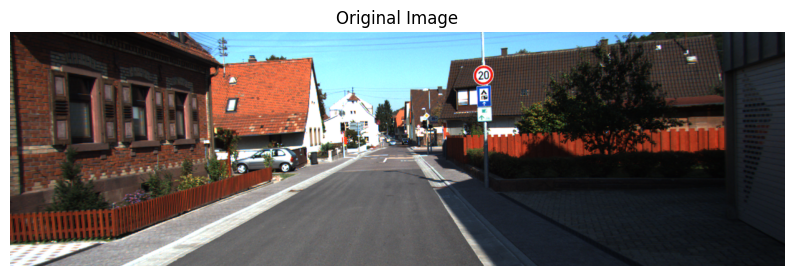

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import pandas as pd
from functions.canny import canny
from functions.otsuToHoughTransform import otsuToHoughTransform

# Read image
image = cv2.imread('images/hough/images/uu_000047.png')
print(image.shape)

# Show image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

In [2]:
# Define the values of theta (angle) and rho (distance from origin)
theta_res = 1  # Resolution of theta in degrees
rho_res = 1    # Resolution of rho in pixels

# Define theta and rho ranges
theta = np.deg2rad(np.arange(-90, 90, theta_res))
height, width, _ = image.shape
max_rho = int(np.sqrt(height**2 + width**2))
rho = np.arange(-max_rho, max_rho, rho_res)

print('Theta (deg):', theta)
print('Rho (px):', rho)


Theta (deg): [-1.57079633 -1.55334303 -1.53588974 -1.51843645 -1.50098316 -1.48352986
 -1.46607657 -1.44862328 -1.43116999 -1.41371669 -1.3962634  -1.37881011
 -1.36135682 -1.34390352 -1.32645023 -1.30899694 -1.29154365 -1.27409035
 -1.25663706 -1.23918377 -1.22173048 -1.20427718 -1.18682389 -1.1693706
 -1.15191731 -1.13446401 -1.11701072 -1.09955743 -1.08210414 -1.06465084
 -1.04719755 -1.02974426 -1.01229097 -0.99483767 -0.97738438 -0.95993109
 -0.9424778  -0.9250245  -0.90757121 -0.89011792 -0.87266463 -0.85521133
 -0.83775804 -0.82030475 -0.80285146 -0.78539816 -0.76794487 -0.75049158
 -0.73303829 -0.71558499 -0.6981317  -0.68067841 -0.66322512 -0.64577182
 -0.62831853 -0.61086524 -0.59341195 -0.57595865 -0.55850536 -0.54105207
 -0.52359878 -0.50614548 -0.48869219 -0.4712389  -0.45378561 -0.43633231
 -0.41887902 -0.40142573 -0.38397244 -0.36651914 -0.34906585 -0.33161256
 -0.31415927 -0.29670597 -0.27925268 -0.26179939 -0.2443461  -0.2268928
 -0.20943951 -0.19198622 -0.17453293 -0.

Create the hough space

In [3]:
# Create Hough space
hough_space = np.zeros((2 * max_rho, len(theta)), dtype=np.uint64)
print('Hough space shape:', hough_space.shape)

Hough space shape: (2594, 180)


Find borders with Canny

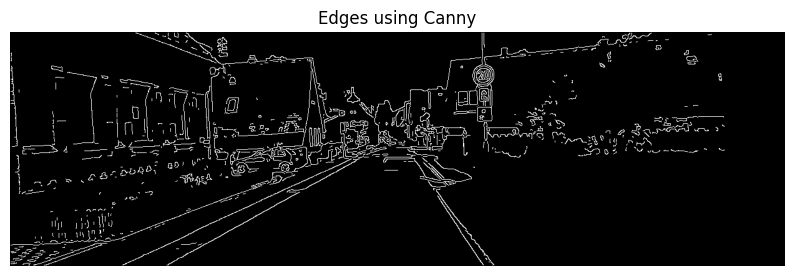

In [4]:
# Find edges
edges = canny(image)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edges using Canny')
plt.show()

Get coordinates of the borders

In [5]:
# Get edge coordinates
y_idx, x_idx = np.where(edges > 0)

# Put the coordinates in a dataframe
df = pd.DataFrame({'x': x_idx, 'y': y_idx})
df

,x,y
0,201,1
1,202,1
2,203,1
3,232,1
4,233,1
...,...,...
17699,252,373
17700,253,373
17701,758,373
17702,773,373


Calculate the hough transform

In [6]:
# Calculaten the Hough space
for i in range(len(x_idx)):
    x = x_idx[i]
    y = y_idx[i]
    for t_idx in range(len(theta)):
        r = int(x * np.cos(theta[t_idx]) + y * np.sin(theta[t_idx]))
        hough_space[r + max_rho, t_idx] += 1

# Show Hough space values using a dataframe
dfHoughSpace = pd.DataFrame(hough_space)
dfHoughSpace


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Histogram of the hough space

Max value in the hough space: 367
Min value in the hough space: 0


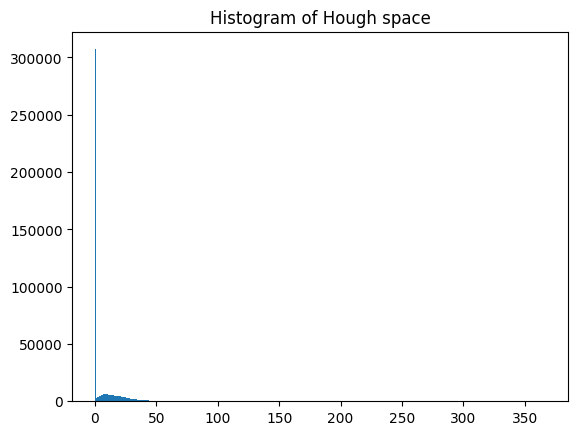

In [7]:
# Get the max and min values of the Hough space
max_value = int(np.max(hough_space))
min_value = int(np.min(hough_space))

print('Max value in the hough space:', max_value)
print('Min value in the hough space:', min_value)

# Show hist of hough space
plt.hist(hough_space.ravel(), bins= max_value+1, range=(min_value, max_value))
plt.title('Histogram of Hough space')
plt.show()

Hough space

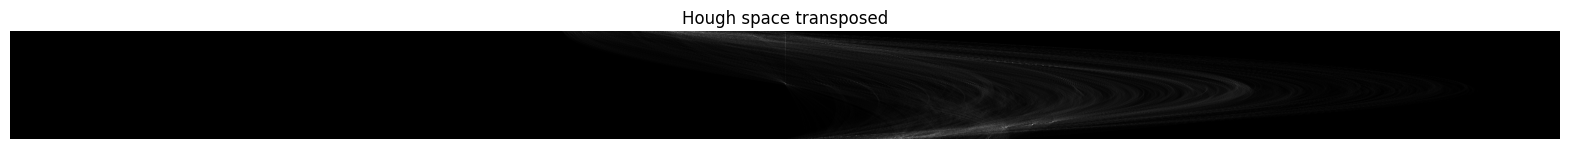

In [8]:
# Show hough space
#Change orientation of hough space
plt.figure(figsize=(20, 20))
plt.imshow(np.transpose(hough_space), cmap='gray')
plt.axis('off')
plt.title('Hough space transposed')
plt.show()

Find the peaks

In [9]:
# Calculate the threshold with Otsu's method getting the maximun intra-class variance
threshold = otsuToHoughTransform(hough_space) - (max_value * 0.05) # 5% of the max value as error margin 
print('Threshold:', threshold)
y_peaks, x_peaks = np.where(hough_space > threshold)

Threshold: 333.65


Draw the lines in the image

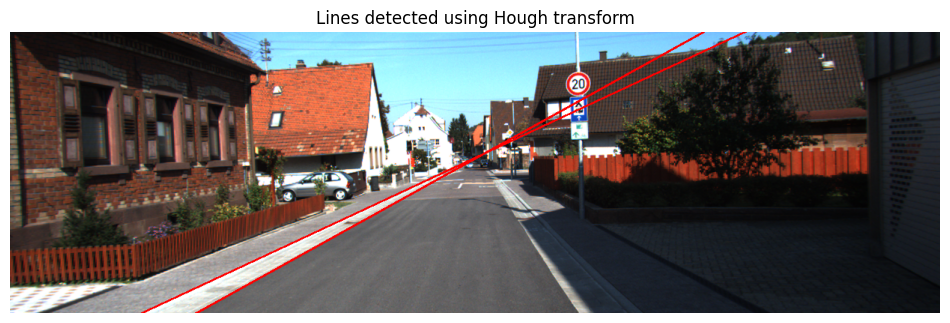

In [10]:
# Draw lines in the image
result = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for i in range(len(x_peaks)):
    r = rho[y_peaks[i]]
    t = theta[x_peaks[i]]
    a = np.cos(t)
    b = np.sin(t)
    x0 = a * r
    y0 = b * r
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Show image with lines
plt.figure(figsize=(12, 12))
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.title('Lines detected using Hough transform')
plt.show()